In [195]:
import utilities as ut
import construction as cs
import singleDatasetAnalysis as san
import multipleDatasetAnalysis as man
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [440]:
#data_in = cs.load_data("data/co-presence/MIO.dat")
data_in = cs.load_data("data/co-presence/LH10.dat")
metadata_in = "data/co-presence/metadata/metadata_LH10.dat"
#data_in = cs.load_data("data/co-presence/LyonSchool.dat")
#metadata_in = "data/co-presence/metadata/metadata_LyonSchool.dat"
print(len(data_in))


150126


In [441]:

# metadati e colori
fp = open(metadata_in, 'r')
meta_dict = dict()
for line in fp.readlines():
    meta_dict[int(line.split("\t")[0])] = line.split("\t")[1][0:-1]
    
fp.close()  
np.unique(list(meta_dict.values()))
dict_colors = dict()

for i in np.unique(list(meta_dict.values())):
    dict_colors[i] = np.random.rand(3,)

In [442]:
data = data_in[0:50000]

In [443]:
graphs,pos = cs.build_graphs(data,500)
G = graphs
len(graphs)

145

In [444]:
dictionary = dict()
for n in G[0].nodes():
    dictionary[n] = dict()
dictionary
for g in G:
    for node in g.nodes():
        #dictionary[node] = dict()
        cliques = nx.cliques_containing_node(g,node)
        for clique in cliques:
            if (len(clique) in dictionary[node]):
                dictionary[node][len(clique)] = dictionary[node][len(clique)] + 1
            else: 
                dictionary[node][len(clique)] = 1
    

#print(dictionary)
# {node : {dim_cricca : frequenza, ...}, .... }

In [445]:
# find max dim cricca, per creare matrice embeddings
size_max_clique = 0
for i in list(dictionary.keys()):
    for j in list(dictionary[i].keys()):
        if j > size_max_clique:
            size_max_clique = j
            
size_max_clique

13

In [478]:
# matrice embeddings = 0
embeddings = np.zeros((len(dictionary),size_max_clique))

In [479]:
# riscrivili sulla matrice
# pos i,j = k
# il nodo i ha k cricche di dimensione j
i = 0
for node in list(dictionary.keys()):
    dic_node = dictionary[node]
    j = 0
    for clique_size in list(dic_node.keys()):
        embeddings[i][clique_size-1] = dic_node[clique_size]
        j = j + 1
    i = i + 1

    
embeddings = embeddings[:,5:]


<BarContainer object of 8 artists>

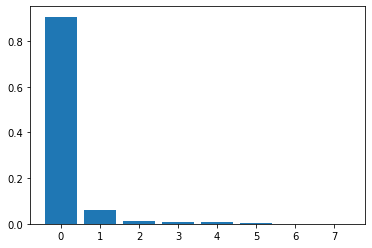

In [480]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(embeddings[0]))

pca.fit(embeddings)

plt.bar(np.arange(len(embeddings[0])),pca.explained_variance_ratio_)

In [481]:
nodes = list(dictionary.keys())

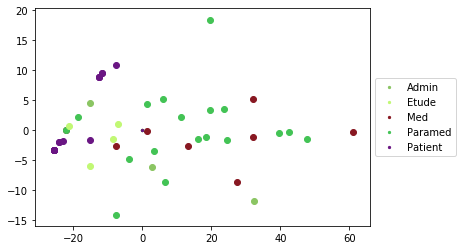

In [482]:
new_embeddings = pca.transform(embeddings)
j = 0 
for i in range(len(new_embeddings)):
    j = j +1 
    plt.scatter(new_embeddings[i][0],new_embeddings[i][1],color=dict_colors[meta_dict[nodes[i]]])
    
for i in np.unique(list(meta_dict.values())):
    plt.scatter(0,0,color= dict_colors[i],label=i,s=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

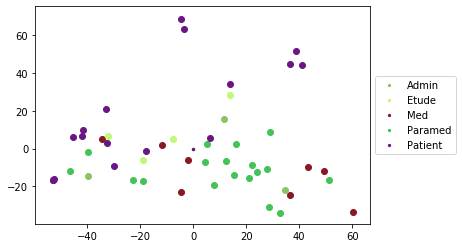

In [471]:
new_embeddings = pca.transform(embeddings)
j = 0 
for i in range(len(new_embeddings)):
    j = j +1 
    plt.scatter(new_embeddings[i][0],new_embeddings[i][1],color=dict_colors[meta_dict[nodes[i]]])
    
for i in np.unique(list(meta_dict.values())):
    plt.scatter(0,0,color= dict_colors[i],label=i,s=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

array([0.03725183, 0.74615256, 0.94952513])

In [295]:
nodes[i]

1098

In [190]:
# inizialize dictionary
dict_degrees = dict()
for n in nodes:
    dict_degrees[n] = []
for g in graphs:
    for n in g.nodes():
        degree = nx.degree(g,n)
        dict_degrees[n].append(degree)
        

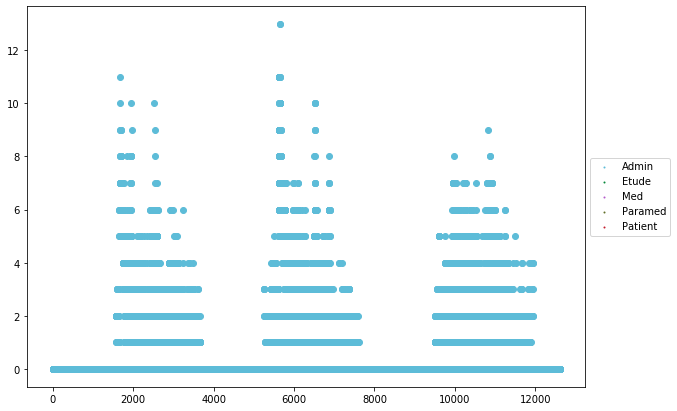

In [210]:
# degree
keys = list(dict_degrees.keys())
plt.figure(figsize=(10,7))
for i in keys:
    degrees = dict_degrees[i]
    if (meta_dict[i]=="Admin"):
        plt.plot((degrees),'o',c = dict_colors[meta_dict[i]],alpha=1)
for i in np.unique(list(meta_dict.values())):
    plt.scatter(0,0,color= dict_colors[i],label=i,s=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
def get_number_conected_components(graphs):
    count = 0

    sg = list(nx.connected_component_subgraphs(graphs))
    sub_graphs = []

    for i in sg:
        if not(len(i)==1):
            count = count + 1
                
    return(count)
def get_conncted_components(data,gap):
    graphs,pos = cs.build_graphs(data,
                   gap = gap)
    
    array_of_subgraphs = []
    
    for g in graphs:
        sg = list(nx.connected_component_subgraphs(g))
        sub_graphs = []

        for i in sg:
            if not(len(i)==1):
                sub_graphs.append(i)
                
        array_of_subgraphs.append(sub_graphs)
        
    return(array_of_subgraphs)